In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,撥券日期(上市、上櫃日期),主辦券商,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元)
0,2020/12/07,永固一-KY,55461.0,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100.0,1.0,680,...,2020/12/16,中國信託,0,0.5,0,0,0.0,0.0,0.0,0.0
1,2020/12/04,信邦七,30237.0,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101.0,1.0,"1,140",...,2020/12/15,富邦,0,0.5,0,0,0.0,0.0,0.0,0.0
2,2020/12/04,達亞,6762.0,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1.0,238,...,2020/12/18,元富,0,4.5,0,0,0.0,0.0,0.0,0.0
3,2020/12/03,森寶一,34891.0,櫃檯買賣,有擔保轉換公司債,美國標,900,103.0,1.0,90,...,2020/12/14,合作金庫,0,0.5,0,0,0.0,0.0,0.0,0.0
4,2020/12/02,揚秦,2755.0,櫃檯買賣,初上櫃,美國標,"1,360",48.0,1.0,178,...,2020/12/16,台新,0,5.0,0,0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)'],
      dtype='object')

## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標) 

In [5]:
df[df['得標總金額(元)'] == '0']['證券名稱']

0      永固一-KY
1         信邦七
2          達亞
3         森寶一
4          揚秦
5      艾美特四KY
6         安普新
102    羅麗芬-KY
145        聯廣
168     泰福-KY
Name: 證券名稱, dtype: object

* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 1. 最低得標相對底標漲幅(%)


In [6]:
## 將存為str 的數字改為 numeric
## type(df['最低投標價格(元)'][1])  本來是字串
df['最低投標價格(元)'] = df['最低投標價格(元)'].apply(lambda x:x.replace(',', ''))
df['最低投標價格(元)'] = pd.to_numeric(df['最低投標價格(元)'])
type(df['最低投標價格(元)'][1])

numpy.float64

In [7]:
df['最低得標價格(元)'] = df['最低得標價格(元)'].apply(lambda x:x.replace(',', ''))
df['最低得標價格(元)'] = pd.to_numeric(df['最低得標價格(元)'])
type(df['最低得標價格(元)'][1])

numpy.float64

In [8]:
## 確認資料長度一樣
df['最低得標價格(元)'].shape, df['最低投標價格(元)'].shape

((210,), (210,))

In [9]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
df.apply(lambda x: f(x['最低投標價格(元)'], x['最低得標價格(元)']), axis = 1)
df["最低得標相對底標漲幅"] = df.apply(lambda x: f(x['最低投標價格(元)'], x['最低得標價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [10]:
df['最低得標相對底標漲幅'].dropna().describe()

count    199.000000
mean      31.355929
std       22.612847
min        0.000000
25%       15.076513
50%       30.000000
75%       42.083367
max      143.520000
Name: 最低得標相對底標漲幅, dtype: float64

(array([11.,  2.,  3.,  5.,  1.,  1.,  3.,  3.,  4.,  4.,  1.,  0.,  2.,
         3.,  0.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  5.,  2.,  1.,
         2.,  2.,  3.,  2.,  2.,  3.,  0.,  3.,  3.,  6.,  6.,  5.,  3.,
         3.,  5.,  4.,  4.,  3.,  2.,  8.,  5.,  3.,  0.,  3.,  0.,  3.,
         3.,  1.,  2.,  2.,  2.,  1.,  3.,  3.,  1.,  1.,  3.,  0.,  3.,
         2.,  0.,  2.,  1.,  1.,  0.,  2.,  0.,  4.,  0.,  0.,  2.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

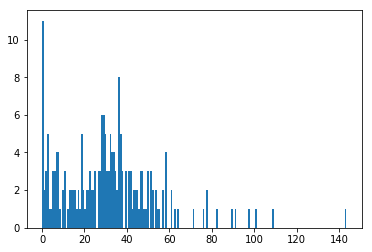

In [11]:
plt.hist(df['最低得標相對底標漲幅'].dropna(), bins = 180)

### 把可轉債跟股票分開來看看

In [12]:
df['發行性質'].value_counts()

初上櫃         92
初上市         59
第一上市初上市     23
無擔保轉換公司債    21
有擔保轉換公司債     9
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [13]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(180, 23)

In [14]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 23)

In [15]:
df_stock['最低得標相對底標漲幅'].dropna().describe()

count    173.000000
mean      35.585449
std       21.192643
min        0.000000
25%       22.917236
50%       32.711621
75%       44.697565
max      143.520000
Name: 最低得標相對底標漲幅, dtype: float64

In [16]:
df_cb['最低得標相對底標漲幅'].dropna().describe()

count    26.000000
mean      3.213356
std       3.513240
min       0.000000
25%       0.652941
50%       2.188431
75%       5.250000
max      15.200000
Name: 最低得標相對底標漲幅, dtype: float64

Text(0, 0.5, 'counts')

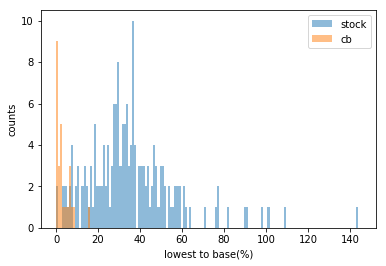

In [17]:
a = df_stock['最低得標相對底標漲幅'].dropna()
b = df_cb['最低得標相對底標漲幅'].dropna()
bins = np.linspace(0, 145, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('lowest to base(%)')
plt.ylabel('counts')

### 橫軸是 最低得標相對底標漲幅(%)

### 觀察一下那些outlier

## 2. 平均得標相對底標漲幅(%)

In [18]:
df['得標加權平均價格(元)'] = df['得標加權平均價格(元)'].apply(lambda x:x.replace(',', ''))
df['得標加權平均價格(元)'] = pd.to_numeric(df['得標加權平均價格(元)'])
type(df['得標加權平均價格(元)'][1])

numpy.float64

In [19]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
df.apply(lambda x: f(x['最低投標價格(元)'], x['得標加權平均價格(元)']), axis = 1)
df["加權得標相對底標漲幅"] = df.apply(lambda x: f(x['最低投標價格(元)'], x['得標加權平均價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [20]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(180, 24)

In [21]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 24)

In [22]:
df_stock['加權得標相對底標漲幅'].dropna().describe()

count    173.000000
mean      41.144461
std       21.628431
min        1.279856
25%       28.726287
50%       37.717949
75%       49.724192
max      149.440000
Name: 加權得標相對底標漲幅, dtype: float64

In [23]:
df_cb['加權得標相對底標漲幅'].dropna().describe()

count    26.000000
mean      5.074106
std       4.039242
min       0.910000
25%       2.165245
50%       4.330097
75%       6.760000
max      20.180000
Name: 加權得標相對底標漲幅, dtype: float64

Text(0, 0.5, 'counts')

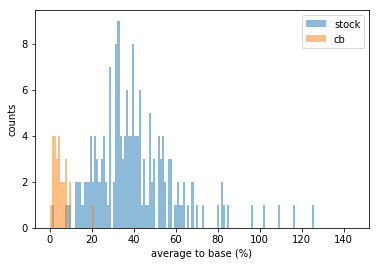

In [24]:
a = df_stock['加權得標相對底標漲幅'].dropna()
b = df_cb['加權得標相對底標漲幅'].dropna()
bins = np.linspace(0, 145, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('average to base (%)')
plt.ylabel('counts')

## 3. 加權得標相對最低得標漲幅(%)

In [25]:
f = lambda x, y :(y/x -1)* 100  ## x到y漲幾%
## df.apply(lambda x: f(x['最低得標價格(元)'], x['得標加權平均價格(元)']), axis = 1)
df["加權得標相對最低得標漲幅"] = df.apply(lambda x: f(x['最低得標價格(元)'], x['得標加權平均價格(元)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [26]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(180, 25)

In [27]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 25)

In [28]:
df_stock['加權得標相對最低得標漲幅'].dropna().describe()

count    173.000000
mean       4.203890
std        2.837480
min        0.000000
25%        2.404181
50%        3.430233
75%        5.259631
max       14.750329
Name: 加權得標相對最低得標漲幅, dtype: float64

In [29]:
df_cb['加權得標相對最低得標漲幅'].dropna().describe()

count    26.000000
mean      1.794366
std       1.110571
min       0.854127
25%       1.077264
50%       1.382023
75%       1.931033
max       4.509881
Name: 加權得標相對最低得標漲幅, dtype: float64

Text(0, 0.5, 'counts')

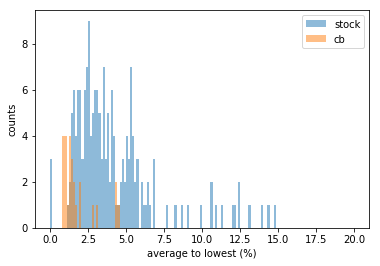

In [30]:
a = df_stock['加權得標相對最低得標漲幅'].dropna()
b = df_cb['加權得標相對最低得標漲幅'].dropna()
bins = np.linspace(0, 20, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('average to lowest (%)')
plt.ylabel('counts')

In [31]:
low2base_stock = df_stock[['開標日期','證券名稱','最低投標價格(元)','最低得標相對底標漲幅','加權得標相對底標漲幅']]
low2base_stock.sort_values(by = ['最低得標相對底標漲幅'], ascending = False).head(10)


,開標日期,證券名稱,最低投標價格(元),最低得標相對底標漲幅,加權得標相對底標漲幅
179,2017/4/5,保瑞,25.00,143.520000,149.440000
66,2019/09/02,新盛力,15.93,109.039548,116.760829
32,2020/05/26,ABC-KY,40.00,101.250000,125.525000
175,2017/4/13,三貝德,70.83,97.797543,102.414231
181,2017/2/24,晶心科,54.25,91.078341,96.589862
61,2019/10/16,安碁資訊,50.00,90.000000,108.760000
78,2019/04/09,雍智科技,65.22,82.306041,84.805274
83,2019/03/07,勤凱,18.68,77.516060,82.012848
77,2019/04/19,勤崴,106.15,77.465850,82.618935
30,2020/06/15,東典光電,57.63,76.297067,82.005900


## 4. 競拍張數占總合格投標數量(張)百分比

### 觀察是不是每次除了流標都全額標出去

In [32]:
success_auction = df['最低得標價格(元)'] > 0 
df[success_auction].shape

(199, 25)

In [33]:
df['合格投標數量(張)'] = df['合格投標數量(張)'].apply(lambda x:x.replace(',', '') if type(x) == str else x)
df['合格投標數量(張)'] = pd.to_numeric(df['合格投標數量(張)'])
type(df['合格投標數量(張)'][1])

numpy.float64

In [34]:
df['競拍數量(張)'] = df['競拍數量(張)'].apply(lambda x:x.replace(',', '') if type(x) == str else x)
df['競拍數量(張)'] = pd.to_numeric(df['競拍數量(張)'])
type(df['競拍數量(張)'][1])

numpy.float64

### 發現有四檔沒有全數標出去

In [35]:
fully_bid = df[success_auction]['合格投標數量(張)'] - df[success_auction]['競拍數量(張)'] > 0
df[success_auction][-fully_bid]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),最低得標相對底標漲幅,加權得標相對底標漲幅,加權得標相對最低得標漲幅
29,2020/07/31,世紀鋼四,99584.0,櫃檯買賣,無擔保轉換公司債,美國標,12750.0,100.00,1.0,"1,275",...,0.5,426,10544.0,100.00,110.0,101.13,100.00,0.0,1.130000,1.130000
31,2020/05/28,豐藝三,61893.0,櫃檯買賣,無擔保轉換公司債,美國標,8500.0,101.00,1.0,850,...,0.5,192,3740.0,101.00,498.0,103.94,101.00,0.0,2.910891,2.910891
34,2020/05/11,新唐一,49191.0,櫃檯買賣,無擔保轉換公司債,美國標,18000.0,100.00,1.0,"1,800",...,0.5,473,5361.0,100.00,110.0,100.91,100.00,0.0,0.910000,0.910000
159,2017/9/18,精測,6510.0,櫃檯買賣,上櫃增資,美國標,1530.0,1267.33,1.0,153,...,1.0,216,1381.0,1267.33,"1,320",1283.55,1267.33,0.0,1.279856,1.279856


In [36]:
f = lambda x, y :(x/y)* 100  ## x占y漲幾%
df["競拍張數占合格張數比"] = df.apply(lambda x: f(x['競拍數量(張)'], x['合格投標數量(張)']) if x['最低得標價格(元)'] > 0 else None, axis = 1) ## 將流標的 還正在標的 設為NaN

In [37]:
## 將股票的都存入 df_stock
stock_filter = df['發行性質'].isin(['初上市','初上櫃','第一上市初上市','第一上櫃初上櫃', '上櫃增資' ]) 
df_stock = df[stock_filter]
df_stock.shape

(180, 26)

In [38]:
## 股票除外的就是可轉債  存入df_cb
df_cb = df[-stock_filter]
df_cb.shape

(30, 26)

In [39]:
df_stock['競拍張數占合格張數比'].dropna().describe()

count    173.000000
mean      27.372133
std       17.581539
min        6.554543
25%       14.797084
50%       22.144591
75%       36.192260
max      110.789283
Name: 競拍張數占合格張數比, dtype: float64

In [40]:
df_cb['競拍張數占合格張數比'].dropna().describe()

count     26.000000
mean      65.664739
std       69.072157
min       19.612367
25%       30.127498
50%       47.083431
75%       62.043840
max      335.758254
Name: 競拍張數占合格張數比, dtype: float64

### 記得把大於100的調成100

Text(0, 0.5, 'counts')

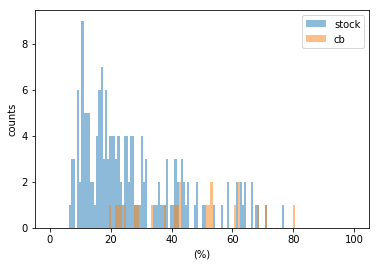

In [41]:
a = df_stock['競拍張數占合格張數比'].dropna()
b = df_cb['競拍張數占合格張數比'].dropna()
bins = np.linspace(0, 100, 145)
plt.hist(a, bins, alpha = 0.5, label = 'stock')
plt.hist(b, bins, alpha = 0.5, label = 'cb')
plt.legend(loc = 'upper right')
plt.xlabel('(%)')
plt.ylabel('counts')

In [ ]:
x_stock = df_stock['最低得標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)

##  觀察lowest2base 對 average2base 的分布

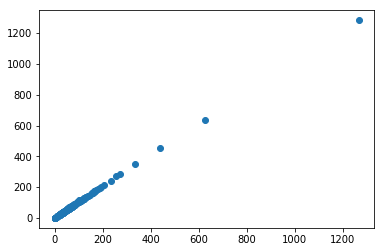

In [43]:
x_stock = df_stock['最低得標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)

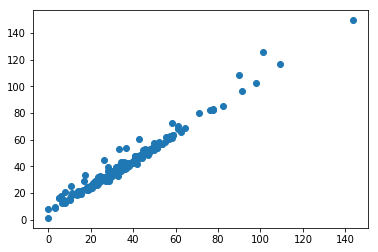

In [42]:
x_stock = df_stock['最低得標相對底標漲幅'].dropna()
y_stock = df_stock['加權得標相對底標漲幅'].dropna()
plt.scatter(x_stock, y_stock)

Text(0, 0.5, 'lowest (price)')

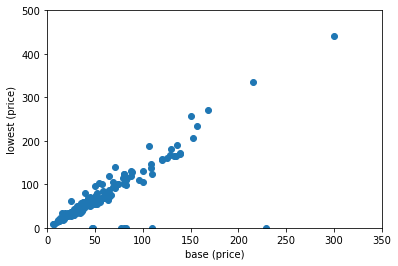

In [58]:
x_stock = df_stock['最低投標價格(元)'].dropna()
y_stock = df_stock['最低得標價格(元)'].dropna()
plt.scatter(x_stock, y_stock)
plt.xlim(0, 350)
plt.ylim(0, 500)
plt.xlabel('base (price)')
plt.ylabel('lowest (price)')

### 最低得標為零的為正在進行中的標案 配飾模型時記得drop掉

## 模型1 ： linear regression (lowest~ base)

In [78]:
df1_stock = df_stock[['最低投標價格(元)','最低得標價格(元)']].dropna()
df1_stock = df1_stock[~df1_stock['最低得標價格(元)'].isin([0])]   ## 把最低得標價格為0的列刪除 ~為相反的意思
x_stock = df1_stock[['最低投標價格(元)']].dropna()
y_stock = df1_stock['最低得標價格(元)'].dropna()
model1 = LinearRegression().fit(x_stock, y_stock)
r_sq = model1.score(x_stock, y_stock)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9570964149981822


Text(0, 0.5, 'average (price)')

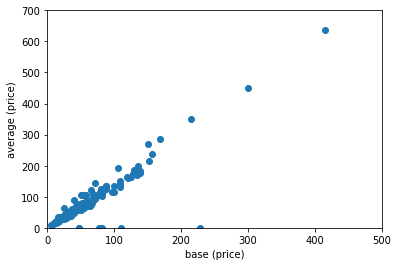

In [59]:
x_stock = df_stock['最低投標價格(元)'].dropna()
y_stock = df_stock['得標加權平均價格(元)'].dropna()
plt.scatter(x_stock, y_stock)
plt.xlim(0, 500)
plt.ylim(0, 700)
plt.xlabel('base (price)')
plt.ylabel('average (price)')

In [49]:
df_stock[['最低得標價格(元)','得標加權平均價格(元)']]

,最低得標價格(元),得標加權平均價格(元)
2,0.00,0.00
4,0.00,0.00
6,0.00,0.00
7,68.60,71.54
8,58.51,66.66
10,62.40,63.61
11,63.60,65.71
12,49.90,51.69
15,124.00,126.33
17,123.00,125.30


### 記得用kernal的方法把hist變平滑

### 5.觀察得標的分布是左偏還右偏
### 已知得標的最低、最高、平均